# Quantum Syncronization with ML - Collision Model

## Importing functions

In [1]:
from syncro_variandoJ import pearson_corr_expec
from qutip import *
import numpy as np
from scipy.sparse import csc_matrix
from scipy.linalg import expm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import time
import warnings
import multiprocessing as mp
from random import randint

## Collecting the data

In [ ]:
cn = 4000
cores = 10

if __name__ == '__main__':
    pool = mp.Pool(cores)
    data2 = list()
    for i in range(0, 41, 1):
        w1 = 0.18+(i/1000)
        inicio = time.time()
        for j in range(1, 26, 1):
            lam = j/500
            listJ = list()
            for l in range(1, cores+1):
                listJ.append([w1, lam, 0.01*l, cn])
            expecX_s1_s2 = pool.starmap(pearson_corr_expec, listJ)
            for k in range(0, len(listJ)):
                data2.append([w1, lam, listJ[k][2], expecX_s1_s2[k][0], expecX_s1_s2[k][1]])
        print(time.time()-inicio, i)
    
    data2 = pd.DataFrame(data2)
    file1 = open('syncro_4000.csv', 'w')
    for i in range(0, len(data2)):
        for j in range(0, 5):
            if j == 3 or j == 4:
                for k in range(0, cn):
                    writeTab(data2.values[i, j][k])
            else:
                writeTab(data2.values[i, j])
        file1.write("\n")
    file1.close()

## Preparing the ML algorithm

In [7]:
def mae_ml(data, meas=100):
    pc = list()
    for i in range(0, len(data)):
        pc.append(pearsonr(data.values[i, 3903:4003], data.values[i, 7903:])[0])
    X = list()
    for j in range(0, len(data)):
        l1 = list(data.values[j, 3:(3+meas)])
        l2 = list(data.values[j, 4003:(4003+meas)])
        X.append(l1+l2)
    X = pd.DataFrame(pd.DataFrame(X))
    
    X_train, X_test, y_train, y_test = train_test_split(X, pc, test_size=0.3)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    prediction = knn.predict(X)
    prevision = knn.predict(X_test)
    
    mae = mean_absolute_error(prevision, y_test)
    print(mae)
    
    return mae, prediction, pc



In [24]:
%%time
mse_list = list()
for i in range(5, 100, 5):
    mse_list.append([i, mse_ml(J = 0.05, last_data = data, first_data = dataset, pc=pc, var=3, meas=i)[0]])
mse_list = pd.DataFrame(mse_list)
plt.plot(mse_list[0], mse_list[1], label="MSE")
plt.xlabel("N (number of measurements used to Train)")
plt.ylabel("MSE (Mean Squared Error)")
plt.legend()
plt.show()

0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 0
0.01
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1
0.02
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 2
0.03
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 3
0.04
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 4
0.05


0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 116
0.07
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 117
0.08
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 118
0.09
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 119
0.1
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 

0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 230
0.01
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 231
0.02
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 232
0.03
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 233
0.04
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64

0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 345
0.06
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 346
0.07
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 347
0.08
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 348
0.09
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64

0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 461
0.02
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 462
0.03
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 463
0.04
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 464
0.05
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64

0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 564
0.05
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 565
0.06
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 566
0.07
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 567
0.08
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64

0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 669
0.1
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 670
0.01
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 671
0.02
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 672
0.03
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 

0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 771
0.02
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 772
0.03
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 773
0.04
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 774
0.05
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64

0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 875
0.06
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 876
0.07
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 877
0.08
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 878
0.09
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64

0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 981
0.02
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 982
0.03
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 983
0.04
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 984
0.05
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64

0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1089
0.1
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1090
0.01
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1091
0.02
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1092
0.03
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: floa

0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1199
0.1
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1200
0.01
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1201
0.02
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1202
0.03
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: floa

0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1311
0.02
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1312
0.03
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1313
0.04
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1314
0.05
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: flo

0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1424
0.05
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1425
0.06
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1426
0.07
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: float64 1427
0.08
0        0.01
1        0.02
2        0.03
3        0.04
4        0.05
         ... 
10245    0.06
10246    0.07
10247    0.08
10248    0.09
10249    0.10
Name: 2, Length: 10250, dtype: flo

KeyboardInterrupt: 

## Trying to predict the Syncronization at the beginning

In [5]:
data = pd.read_csv("syncro_4000_teste.csv", header=None).drop(8003, axis=1)
data[0] = data[0]/0.2
dataset = pd.DataFrame(data.values[:, 0])
dataset[1] = pd.DataFrame(data.values[:, 1])
dataset[2] = pd.DataFrame(data.values[:, 2])
XH1 = list()
XH2 = list()
for i in range(0, len(dataset)):
    XH1.append(data.values[i, 3:103])
    XH2.append(data.values[i, 4003:4103])
dataset[3] = XH1
dataset[4] = XH2

pc = list()
for i in range(0, len(data)):
    pc.append(pearsonr(data.values[i, 3903:4003], data.values[i, 7903:8003])[0])

In [28]:
def plotCompar_varJ(J, data, meas=100):
    dados = data[data[2] == J].reset_index().drop("index", axis=1)
    ml = mae_ml(dados, meas=meas)
    knn = ml[1]
    pc = ml[2]
    cm = plt.cm.get_cmap('RdYlBu')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.tight_layout(pad=2.0)
    plt1 = ax1.scatter(dados[1], dados[0], c=pc, cmap = cm, s=1000)
    plt2 = ax2.scatter(dados[1], dados[0], c=knn, cmap = cm, s=1000)
    ax1.title.set_text("Real Pearson Coefficient")
    ax2.title.set_text("Predicted Pearson Coefficient")
    fig.text(0.5, 0.04, r'$\lambda$', ha='center')
    fig.text(-0.02, 0.5, r'$\omega_1/\omega_2$', va='center', rotation='vertical')
    cbar_ax = fig.add_axes([1.00, 0.15, 0.02, 0.7])
    fig.colorbar(plt1, cax=cbar_ax)

0.15222779367663097


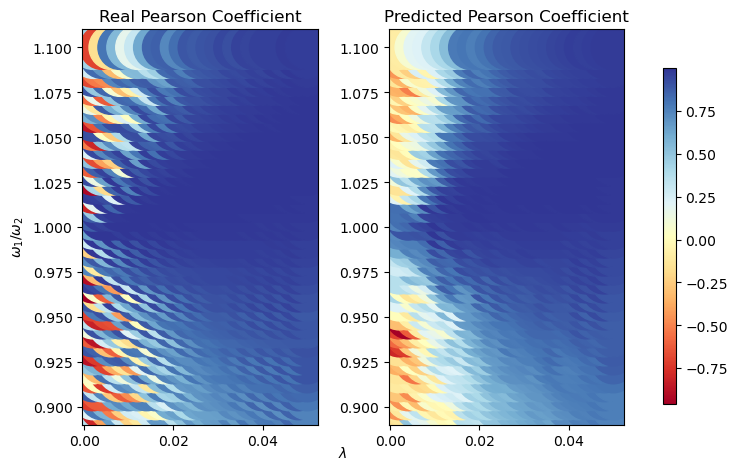

In [29]:
plotCompar_varJ(0.01, data, meas=100)

## Noise

Adding error to the test data to see if the algorithm is still able to predict accurately the Pearson Coefficient.

In [34]:
def adding_Error(data, rand_error, meas):
    warnings.filterwarnings("ignore")
    error_data = data.copy()
    for i in range(3, meas+3):
        for j in range(0, len(error_data)):
            error_data[i][j] = error_data[i][j]+(rand_error*randint(-10,10)*0.1)
            error_data[i+4000][j] = error_data[i+4000][j]+(rand_error*randint(-10,10)*0.1)
    return error_data

def error_pearson(data, meas_vals, error_vals):
    mae_list_error = list()
    for i in meas_vals:
        for j in error_vals:
            print([i, j])
            mae_list_prov = list()
            mae_list_prov.append(i)
            mae_list_prov.append(j*100)
            mae_list_prov.append(mae_ml(adding_Error(data, rand_error = j, meas=i), meas=i)[0])
            mae_list_error.append(mae_list_prov)
    mae_list_error = pd.DataFrame(mae_list_error)
    
    return mae_list_error

def plot_pearson_error(mae_list_error, meas_vals):
    for i in meas_vals:
        plt.plot(mae_list_error[1][mae_list_error[0]==i], mae_list_error[2][mae_list_error[0]==i], label=i)
    plt.xlabel("Error added on the test data (%)")
    plt.ylabel("MAE (Mean Absolute Error)")
    plt.legend()
    plt.show()

In [38]:
%%time
mse_list_error_global = error_pearson(data, [5, 10, 25, 50, 75, 100], [0, 0.001, 0.005, 0.008, 0.010, 0.015, 0.018, 0.02, 0.03, 0.04, 0.05])
mse_list_error_global.to_csv("mse_list_error_collision.csv")

[5, 0]
0.15385053678311086
[5, 0.001]
0.19192476101069972
[5, 0.005]
0.27607490873857576
[5, 0.008]
0.29440931067518034
[5, 0.01]
0.3075103629435747
[5, 0.015]
0.333012745114
[5, 0.018]
0.35638841743584015
[5, 0.02]
0.36352750476315004
[5, 0.03]
0.4120662629017895
[5, 0.04]
0.4664136360770263
[5, 0.05]
0.5117675078061227
[10, 0]
0.09831192283441507
[10, 0.001]
0.11768366943401765
[10, 0.005]
0.19265556492193758
[10, 0.008]
0.22990684739835812
[10, 0.01]
0.23975459115939432
[10, 0.015]
0.2685594477238161
[10, 0.018]
0.2836385189369774
[10, 0.02]
0.2918226274796024
[10, 0.03]
0.3073352166892071
[10, 0.04]
0.3185494723615496
[10, 0.05]
0.3401611002522599
[25, 0]
0.13197971449935308
[25, 0.001]
0.13687212520928707
[25, 0.005]
0.13437022195624687
[25, 0.008]
0.1419162468102594
[25, 0.01]
0.14800744091434578
[25, 0.015]
0.16056678366845184
[25, 0.018]
0.16308949609422455
[25, 0.02]
0.17415174362909072
[25, 0.03]
0.1978989264036733
[25, 0.04]
0.21566764624936222
[25, 0.05]
0.23136873990596157

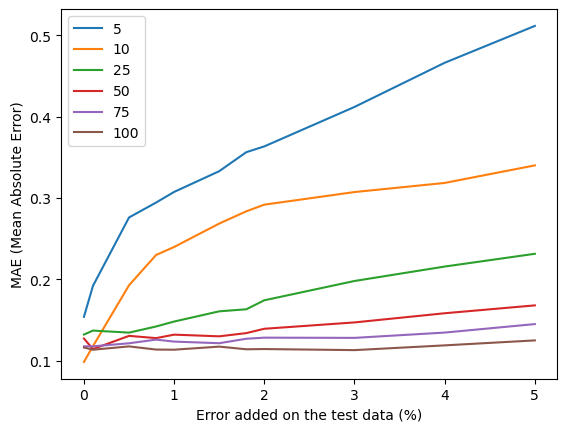

In [39]:
plot_pearson_error(mse_list_error_global, [5, 10, 25, 50, 75, 100])